In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()
# Connect to the Artemis Device
ble.connect()

2024-05-14 15:23:33,510 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:42:30:78:92:49


2024-05-14 15:23:38,288 | INFO     |: Connected to c0:42:30:78:92:49


/Users/harrypeng/Desktop/ECE4160/lab1/ble_robot-1.1/ble_python/base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
timeData = []
tof1Data = []
tof2Data = []
leftPWM = []
rightPWM = []
errorData = []
p_data = []
i_data = []
d_data = []
tof1RawData = []

In [4]:
def pid_fd_notification_handler(uuid, char_bytearr):
    global timeData, tof1Data, tof2Data, leftPWM, rightPWM, errorData, p_data, i_data, d_data, tof1RawData
    string = ble.bytearray_to_string(char_bytearr)
    parts = string.split("|")  
    print(parts)
    timeData.append(int(parts[0][2:]))
    tof1Data.append(float(parts[1][6:]))
    tof2Data.append(float(parts[2][6:]))
    leftPWM.append(float(parts[3][8:]))
    rightPWM.append(float(parts[4][9:]))
    errorData.append(float(parts[5][10:]))
    p_data.append(float(parts[6][7:]))
    i_data.append(float(parts[7][7:]))
    d_data.append(float(parts[8][7:]))
    tof1RawData.append(float(parts[9][9:]))
    

In [5]:
ble.start_notify(ble.uuid["RX_STRING"], pid_fd_notification_handler)

In [6]:
ble.send_command(CMD.TOF_READINGS, "")

['T:68617', 'Dist1:2930', 'Dist2:966']
['T:68625', 'Dist1:2930', 'Dist2:966']
['T:68634', 'Dist1:2930', 'Dist2:966']
['T:68643', 'Dist1:2930', 'Dist2:966']
['T:68648', 'Dist1:2930', 'Dist2:966']
['T:68664', 'Dist1:2930', 'Dist2:966']
['T:68671', 'Dist1:2930', 'Dist2:966']
['T:68682', 'Dist1:2930', 'Dist2:966']
['T:68708', 'Dist1:2930', 'Dist2:944']
['T:68722', 'Dist1:2920', 'Dist2:944']
['T:68735', 'Dist1:2920', 'Dist2:944']
['T:68746', 'Dist1:2920', 'Dist2:944']
['T:68754', 'Dist1:2920', 'Dist2:944']
['T:68765', 'Dist1:2920', 'Dist2:944']
['T:68781', 'Dist1:2920', 'Dist2:944']
['T:68801', 'Dist1:2920', 'Dist2:965']
['T:68809', 'Dist1:2920', 'Dist2:965']
['T:68826', 'Dist1:2922', 'Dist2:965']
['T:68841', 'Dist1:2922', 'Dist2:965']
['T:68857', 'Dist1:2922', 'Dist2:965']
['T:68863', 'Dist1:2922', 'Dist2:965']
['T:68874', 'Dist1:2922', 'Dist2:965']
['T:68890', 'Dist1:2922', 'Dist2:965']
['T:68901', 'Dist1:2922', 'Dist2:949']
['T:68917', 'Dist1:2926', 'Dist2:949']
['T:68928', 'Dist1:2926',

In [31]:
ble.send_command(CMD.PID_STATUS_INI, "1")

In [32]:
# ble.send_command(CMD.SET_PID_VALUES, "|0.2|0.05|0.3")

ble.send_command(CMD.SET_PID_VALUES, "|4.5|0.05|2")
# ble.send_command(CMD.SET_PID_VALUES, "|10|0.05|4")

In [9]:
'''
with new battery:
4.5|0.05|2:
    150 & 0.7
    120 & 0.7

'''
ble.send_command(CMD.SET_FORWARD_SPEED, "150")
ble.send_command(CMD.SET_FD_CALI, "0.7") # cali_factor * right_power 

In [10]:
ble.send_command(CMD.PID_FD, "")

2024-05-06 20:51:40,563 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [10]:
ble.send_command(CMD.SEND_PID_FD_DEBUG_READINGS, "")

['T:79', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightPWM:90.0', 'errorData:1507.0', 'pData:15070.0', 'iData:5.952', 'dData:0.0', 'Dist1Raw:1837.0']
['T:81', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightPWM:90.0', 'errorData:1507.0', 'pData:15070.0', 'iData:6.103', 'dData:0.0', 'Dist1Raw:1837.0']
['T:94', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightPWM:90.0', 'errorData:1507.0', 'pData:15070.0', 'iData:7.82', 'dData:0.0', 'Dist1Raw:1837.0']
['T:99', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightPWM:90.0', 'errorData:1507.0', 'pData:15070.0', 'iData:7.459', 'dData:0.0', 'Dist1Raw:1837.0']
['T:105', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightPWM:90.0', 'errorData:1507.0', 'pData:15070.0', 'iData:7.911', 'dData:0.0', 'Dist1Raw:1837.0']
['T:115', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightPWM:90.0', 'errorData:1507.0', 'pData:15070.0', 'iData:8.665', 'dData:0.0', 'Dist1Raw:1837.0']
['T:127', 'Dist1:1837.0', 'Dist2:0.0', 'leftPWM:150.0', 'rightP

In [11]:
print(len(timeData))
print(len(tof1Data))
print(len(leftPWM))
print(len(p_data))
print(len(i_data))
print(len(tof1RawData))

500
500
500
500
500
500


In [12]:
unused_index_arr = np.argwhere(np.array(timeData)==0)
if (len(unused_index_arr) != 0):
    unused_index = unused_index_arr[0][0]
else:
    unused_index = len(timeData)
print(unused_index)

245


In [13]:
# # plot front distance vs time
# plt.figure(figsize=(15, 10))
# # plt.scatter(np.array(timeData), np.array(tof1Data), color="blue", label="distance")
# # dispose unused array parts

# plt.plot(np.array(timeData)[:unused_index], np.array(tof1Data)[:unused_index], linestyle='-', marker='o', color='blue', label='distance')
# # plt.plot(np.array(timeData)[50:100], np.array(tof1Data)[50:100], linestyle='-', marker='o', color='blue', label='distance')
# plt.title("distance vs time")
# plt.xlabel("time(ms)")
# plt.ylabel("distance(mm)")
# plt.show()

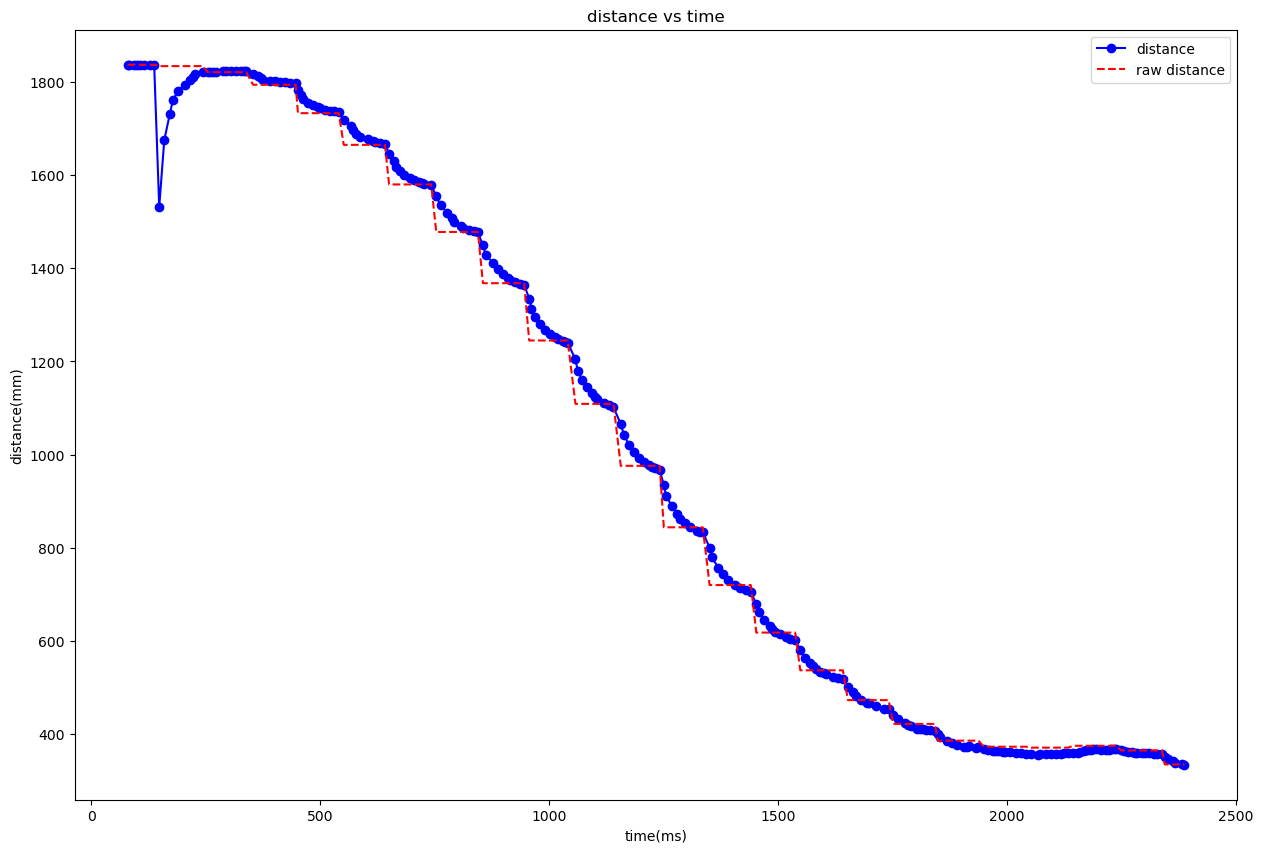

In [14]:
########## For KF compare plots ###########

# plot front distance vs time
plt.figure(figsize=(15, 10))
# dispose unused array parts

plt.plot(np.array(timeData)[:unused_index], np.array(tof1Data)[:unused_index], linestyle='-', marker='o',color='blue', label='distance')
plt.plot(np.array(timeData)[:unused_index], np.array(tof1RawData)[:unused_index], linestyle='--', color='red', label='raw distance')

plt.title("distance vs time")
plt.xlabel("time(ms)")
plt.ylabel("distance(mm)")
plt.legend()
plt.show()

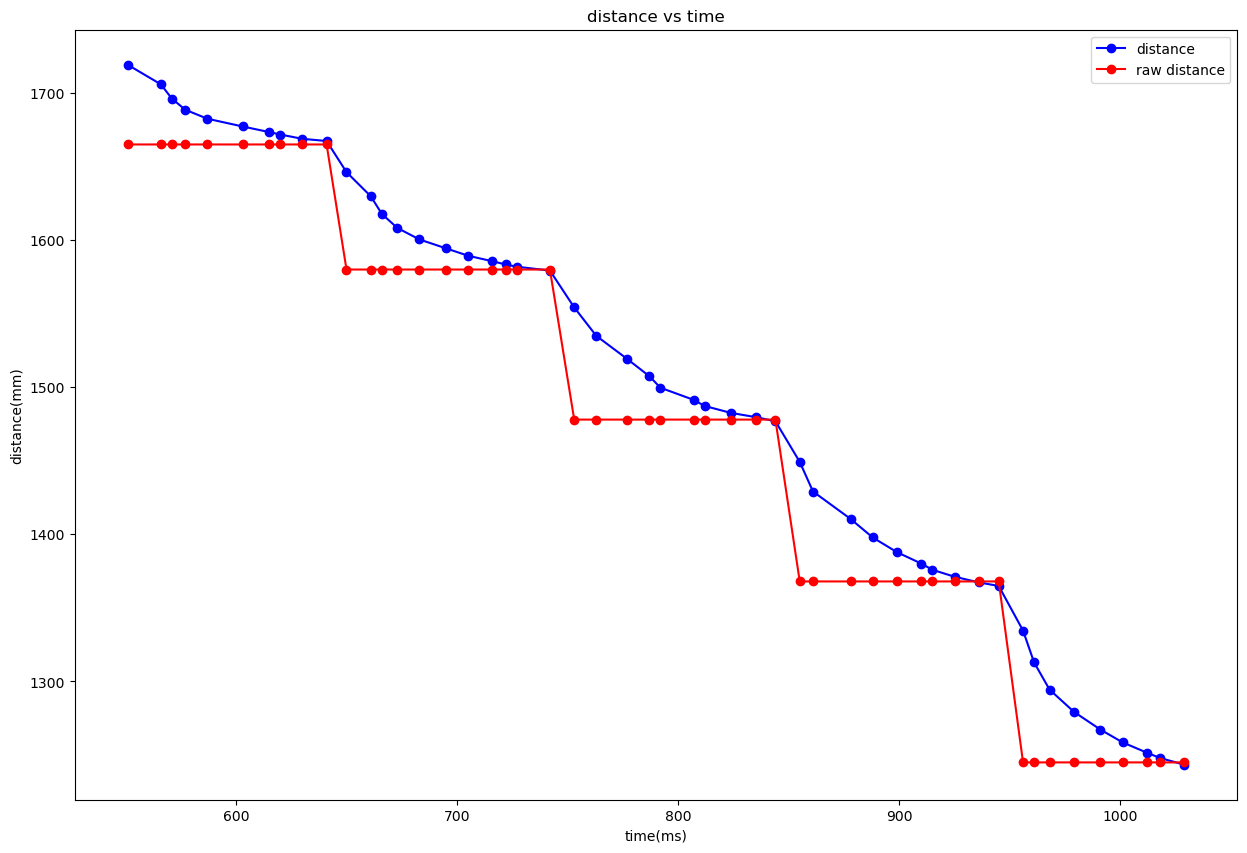

In [15]:
##### KF zoom plot #######
########## For KF compare plots ###########

# plot front distance vs time
plt.figure(figsize=(15, 10))

plt.plot(np.array(timeData)[50:100], np.array(tof1Data)[50:100], linestyle='-', marker='o', color='blue', label='distance')
plt.plot(np.array(timeData)[50:100], np.array(tof1RawData)[50:100], linestyle='-', marker='o', color='red', label='raw distance')

plt.title("distance vs time")
plt.xlabel("time(ms)")
plt.ylabel("distance(mm)")
plt.legend()
plt.show()

In [16]:
# # plot front error vs time
# plt.figure(figsize=(15, 10))
# # plt.scatter(np.array(timeData), np.array(tof1Data), color="blue", label="distance")
# plt.plot(np.array(timeData)[:unused_index], np.array(errorData)[:unused_index], linestyle='-', marker='o', color='green', label='error')
# plt.plot(np.array(timeData)[:unused_index], np.zeros((len(timeData)))[:unused_index], linestyle='--', color='black', label='error')
# plt.title("error vs time")
# plt.xlabel("time(ms)")
# plt.ylabel("error(mm)")
# plt.show()

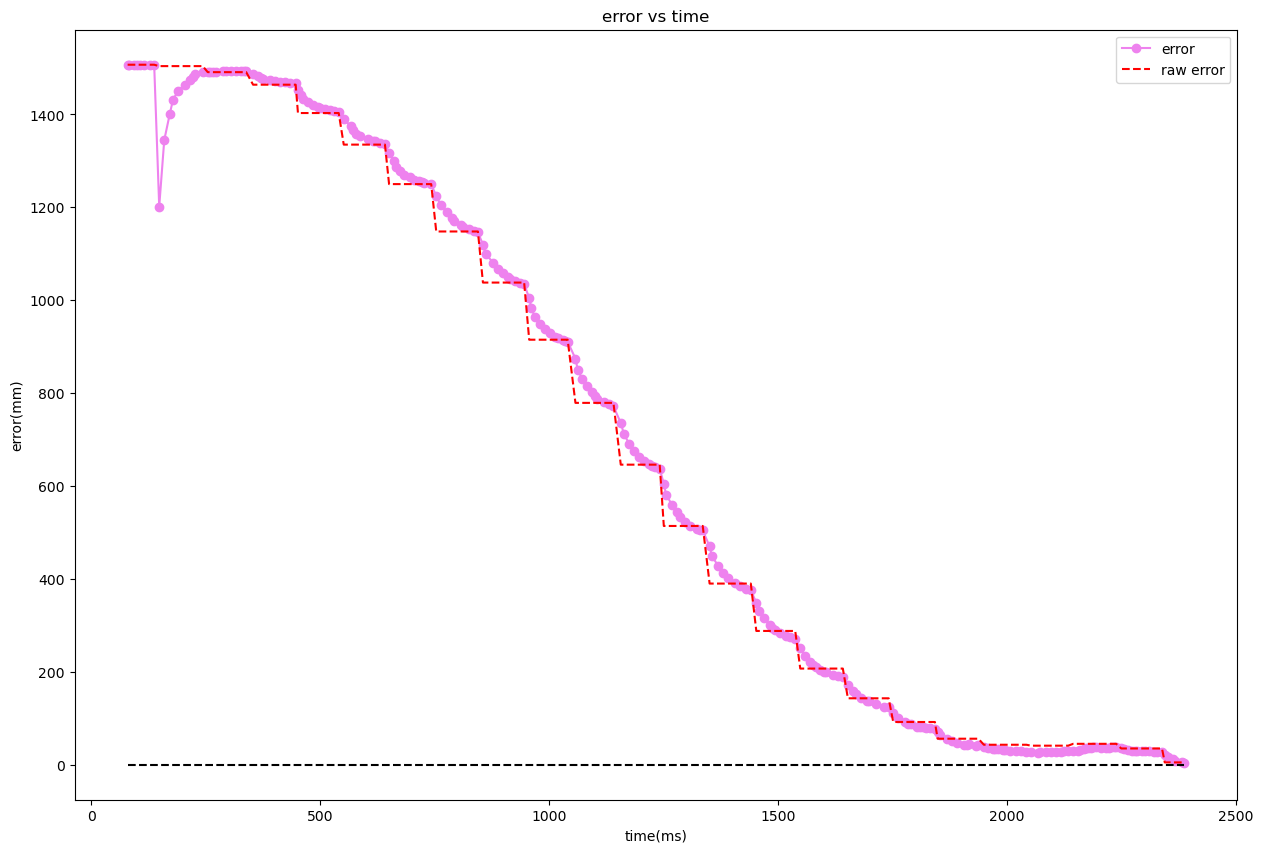

In [17]:
########## For KF Compare plots ########
# plot front error vs time
plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(errorData)[:unused_index], linestyle='-', marker='o', color='violet', label='error')
plt.plot(np.array(timeData)[:unused_index], np.array(tof1RawData)[:unused_index] - 330.0, linestyle='--', color='red', label='raw error')
plt.plot(np.array(timeData)[:unused_index], np.zeros((len(timeData)))[:unused_index], linestyle='--', color='black')
plt.title("error vs time")
plt.xlabel("time(ms)")
plt.ylabel("error(mm)")
plt.legend()
plt.show()

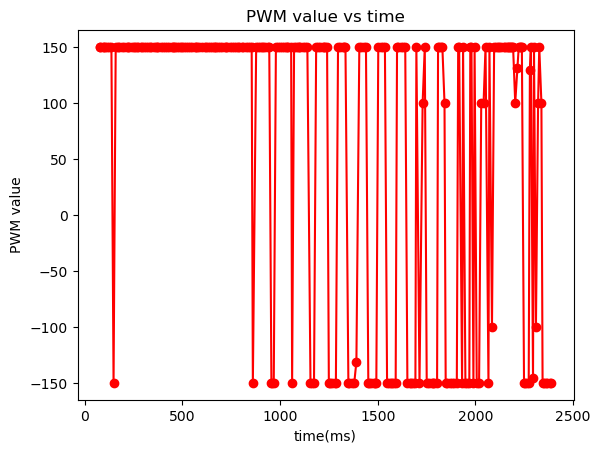

In [18]:
# plot PWM value vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(leftPWM)[:unused_index], linestyle='-', marker='o', color='red', label='PWM')
plt.title("PWM value vs time")
plt.xlabel("time(ms)")
plt.ylabel("PWM value")
plt.show()

In [19]:
# # save the readings data
# # Stack the arrays vertically
# data = np.vstack((np.array(timeData)[:unused_index], np.array(leftPWM)[:unused_index], np.array(tof1Data)[:unused_index]))
# # Get the current date and time
# now = datetime.now()

# # Format the date and time as a string
# date_time_str = now.strftime("%Y-%m-%d_%H-%M-%S")

# # Set float format to avoid scientific notation
# float_format = "%.8f"

# # Create the filename with the date and time
# filename = f"/Users/harrypeng/Desktop/ECE4160/lab1/ble_robot-1.1/ble_python/kalman_readings_csv/time_pwm_distance_{date_time_str}.csv"

# # Save the data to a CSV file
# np.savetxt(filename, data.T, delimiter=",", header="Time,PWM,ToF", comments="", fmt=float_format)


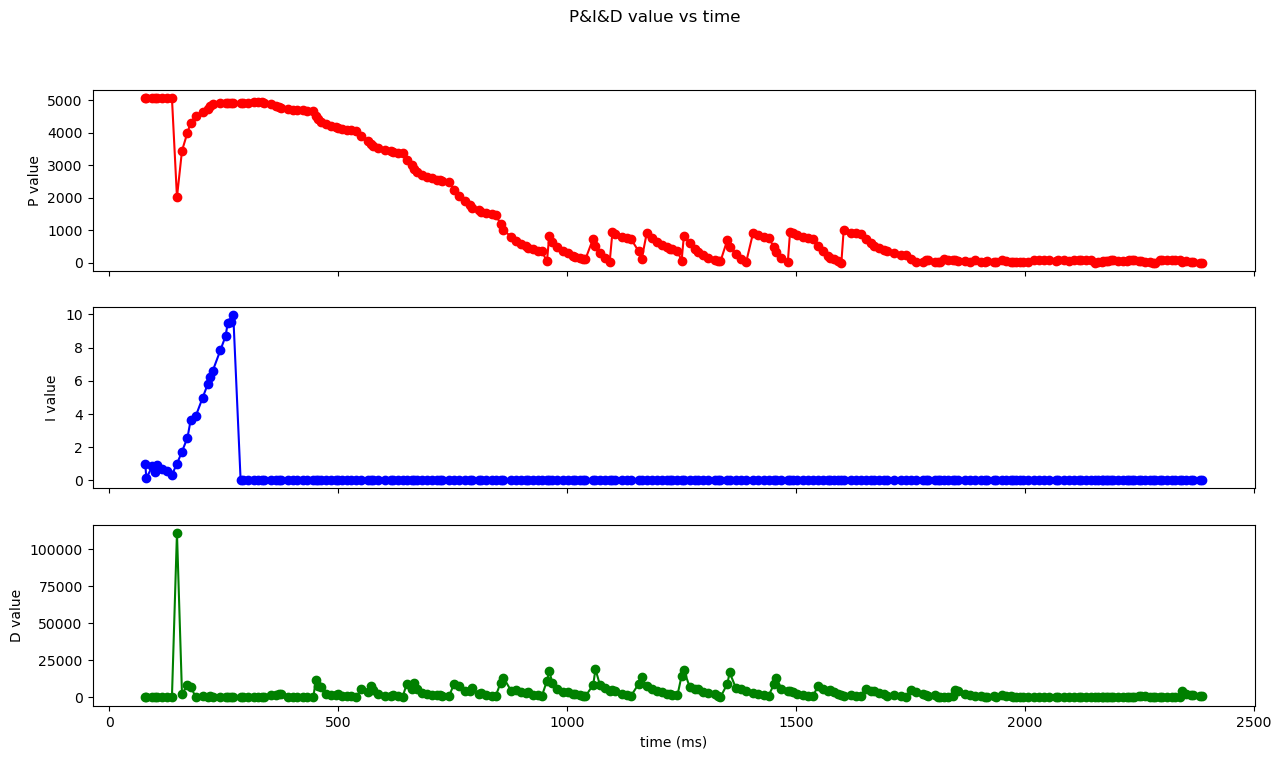

2024-05-05 18:30:11,612 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [20]:
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Plot P data
ax1.plot(np.array(timeData)[:unused_index], np.array(p_data)[:unused_index], linestyle='-', marker='o', color='red', label='p_data')
ax1.set_ylabel('P value')

# Plot I data
ax2.plot(np.array(timeData)[:unused_index], np.array(i_data)[:unused_index], linestyle='-', marker='o', color='blue', label='i_data')
ax2.set_ylabel('I value')

# Plot D data
ax3.plot(np.array(timeData)[:unused_index], np.array(d_data)[:unused_index], linestyle='-', marker='o', color='green', label='d_data')
ax3.set_ylabel('D value')
ax3.set_xlabel('time (ms)')

# Set title and legend
plt.suptitle('P&I&D value vs time')
# plt.legend()

# Display the figure
plt.show()

Lab6 - Orientation Control

In [10]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Get ArtemisBLEController object
ble = get_ble_controller()
# Connect to the Artemis Device
ble.connect()

2024-05-06 22:54:01,830 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:42:30:78:92:49


2024-05-06 22:54:04,413 | INFO     |: Connected to c0:42:30:78:92:49


In [12]:
# ble.send_command(CMD.GYR_READINGS, "")

In [13]:
timeData = []
yawData = []
leftPWM = []
rightPWM = []
yawErrorData = []
p_data = []
i_data = []
d_data = []
powerData = []
motor_direction = []

In [14]:
def pid_orient_notification_handler(uuid, char_bytearr):
    global timeData, yawData, leftPWM, rightPWM, yawErrorData, p_data, i_data, d_data, powerData,motor_direction
    string = ble.bytearray_to_string(char_bytearr)
    parts = string.split("|")  
    print(parts)
    timeData.append(int(parts[0][2:]))
    yawData.append(float(parts[1][4:]))
    leftPWM.append(float(parts[2][8:]))
    rightPWM.append(float(parts[3][9:]))
    yawErrorData.append(float(parts[4][9:]))
    p_data.append(float(parts[5][7:]))
    i_data.append(float(parts[6][7:]))
    d_data.append(float(parts[7][7:]))
    motor_direction.append(int(parts[8][4:]))
    powerData.append(float(parts[9][6:]))
    

In [15]:
ble.start_notify(ble.uuid["RX_STRING"], pid_orient_notification_handler)

In [16]:
ble.send_command(CMD.PID_STATUS_INI, "1")

In [17]:
# orientation control
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|0.5|0.1|10")
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.8|50")
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|0.5|0|0")
# ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|2.5|0.8|17")
ble.send_command(CMD.SET_ORIENT_PID_VALUES, "|4|0.08|1")


In [20]:
ble.send_command(CMD.PID_ORIENT, "")

In [21]:
ble.send_command(CMD.SEND_PID_ORIENT_DEBUG_READINGS, "")

['T:81', 'Yaw:-15.457', 'leftPWM:0.0', 'rightPWM:0.0', 'YawError:45.0', 'pData:0.0', 'iData:0.0', 'dData:0.0', 'Dir:0', 'power:0.0']
['T:84', 'Yaw:-15.457', 'leftPWM:230.0', 'rightPWM:172.500', 'YawError:45.1', 'pData:180.6', 'iData:0.10', 'dData:15000.508', 'Dir:0', 'power:230.0']
['T:88', 'Yaw:-15.458', 'leftPWM:180.0', 'rightPWM:135.0', 'YawError:45.2', 'pData:180.8', 'iData:0.25', 'dData:0.122', 'Dir:0', 'power:180.0']
['T:99', 'Yaw:-15.459', 'leftPWM:180.0', 'rightPWM:135.0', 'YawError:45.3', 'pData:180.13', 'iData:0.64', 'dData:0.122', 'Dir:0', 'power:180.0']
['T:110', 'Yaw:-15.160', 'leftPWM:180.0', 'rightPWM:135.0', 'YawError:44.704', 'pData:178.816', 'iData:0.104', 'dData:-27.195', 'Dir:0', 'power:180.0']
['T:121', 'Yaw:-14.752', 'leftPWM:180.0', 'rightPWM:135.0', 'YawError:44.296', 'pData:177.185', 'iData:0.143', 'dData:-37.84', 'Dir:0', 'power:180.0']
['T:147', 'Yaw:-13.41', 'leftPWM:180.0', 'rightPWM:135.0', 'YawError:42.585', 'pData:170.341', 'iData:0.231', 'dData:-65.806'

In [21]:
print(len(timeData))
print(len(yawData))
print(len(leftPWM))
print(len(p_data))
print(len(i_data))
print(len(powerData))
print(yawData)

189
189
189
189
189
189
[3.688, 3.689, 3.689, 3.689, 4.71, 4.489, 5.432, 6.938, 9.46, 11.194, 13.587, 15.11, 17.945, 19.748, 22.812, 26.113, 28.814, 32.438, 34.744, 38.373, 40.683, 44.722, 48.76, 51.615, 56.103, 59.105, 63.822, 66.433, 70.35, 74.722, 77.782, 82.792, 85.69, 94.172, 97.34, 100.903, 103.635, 106.67, 108.293, 110.842, 112.74, 113.46, 114.567, 115.372, 116.99, 118.19, 119.809, 120.785, 122.512, 124.43, 125.721, 127.75, 128.742, 129.859, 131.533, 132.399, 133.76, 135.328, 136.184, 137.338, 138.619, 139.73, 141.474, 142.722, 143.816, 144.691, 145.28, 145.602, 145.951, 146.23, 146.474, 147.402, 148.17, 148.937, 149.708, 150.92, 151.581, 152.573, 153.895, 155.86, 156.191, 156.964, 157.833, 158.895, 158.97, 159.137, 159.466, 159.837, 160.97, 160.246, 161.344, 162.338, 162.636, 163.249, 163.1, 163.29, 163.84, 163.158, 163.702, 164.451, 164.848, 165.178, 165.773, 166.548, 167.9, 168.17, 168.933, 169.104, 169.275, 168.84, 168.551, 168.914, 169.677, 170.231, 170.578, 171.401, 172.41

In [22]:
unused_index_arr = np.argwhere(np.array(timeData)==0)
if (len(unused_index_arr) != 0):
    unused_index = unused_index_arr[0][0]
else:
    unused_index = len(timeData)
print(unused_index)

189


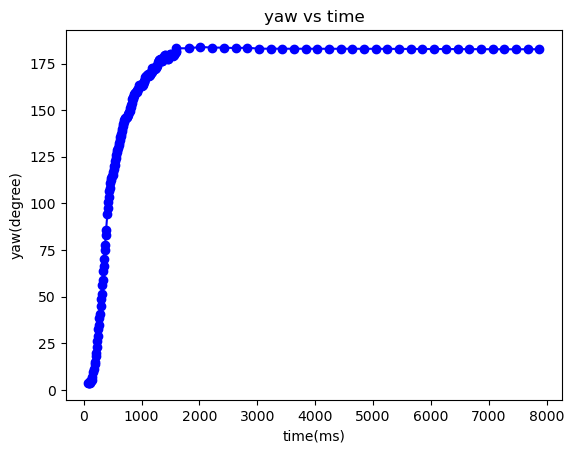

In [23]:
# plot Yaw vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(yawData)[:unused_index], linestyle='-', marker='o', color='blue', label='yaw')
# plt.plot(np.array(timeData), np.array(yawData), linestyle='-', marker='o', color='blue', label='yaw')
plt.title("yaw vs time")
plt.xlabel("time(ms)")
plt.ylabel("yaw(degree)")
plt.show()

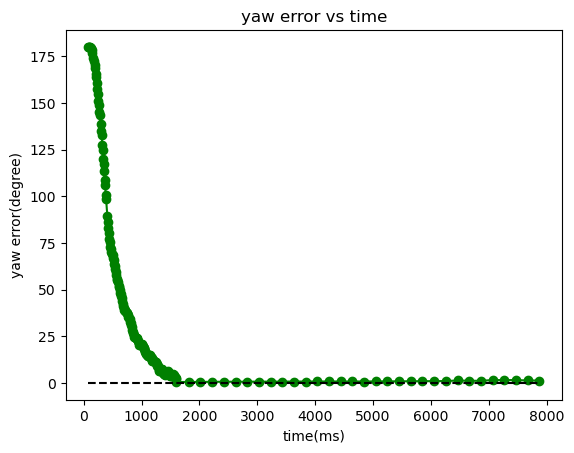

2024-05-06 20:52:55,081 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [24]:
# plot yaw error vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(yawErrorData)[:unused_index], linestyle='-', marker='o', color='green', label='yaw error')
plt.plot(np.array(timeData)[:unused_index], np.zeros((len(timeData)))[:unused_index], linestyle='--', color='black')
# plt.plot(np.array(timeData), np.array(yawErrorData), linestyle='-', marker='o', color='green', label='yaw error')
# plt.plot(np.array(timeData), np.zeros((len(timeData))), linestyle='--', color='black')
plt.title("yaw error vs time")
plt.xlabel("time(ms)")
plt.ylabel("yaw error(degree)")
plt.show()

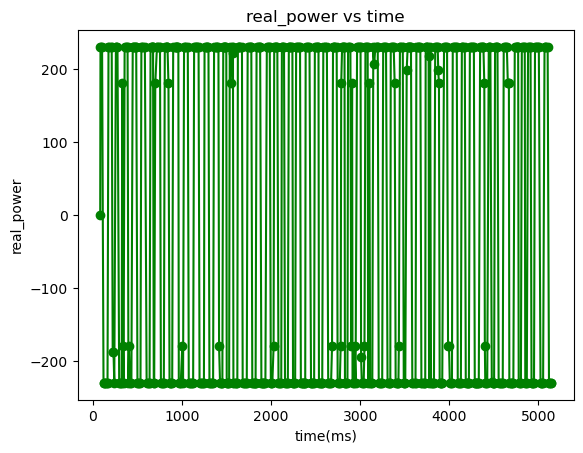

2024-05-05 19:39:10,703 | INFO     |: Disconnected from 1EF8FB8D-1A06-FB11-4002-B52B84BE3598


In [16]:
# plot real power vs time
# plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(powerData)[:unused_index], linestyle='-', marker='o', color='green', label='yaw error')
plt.title("real_power vs time")
plt.xlabel("time(ms)")
plt.ylabel("real_power")
plt.show()

In [ ]:
# plot PWM left value vs time
plt.figure(figsize=(15, 10))
plt.plot(np.array(timeData)[:unused_index], np.array(leftPWM)[:unused_index], linestyle='-', marker='o', color='red', label='PWM')
# plt.plot(np.array(timeData), np.array(leftPWM), linestyle='-', marker='o', color='red', label='PWM')
plt.title("left PWM value vs time")
plt.xlabel("time(ms)")
plt.ylabel("PWM value")
plt.show()

In [ ]:
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Plot P data
ax1.plot(np.array(timeData)[:unused_index], np.array(p_data)[:unused_index], linestyle='-', marker='o', color='red', label='p_data')
# ax1.plot(np.array(timeData), np.array(p_data), linestyle='-', marker='o', color='red', label='p_data')
ax1.set_ylabel('P value')
ax3.set_xlabel('time (ms)')

# Plot I data
ax2.plot(np.array(timeData)[:unused_index], np.array(i_data)[:unused_index], linestyle='-', marker='o', color='blue', label='i_data')
# ax2.plot(np.array(timeData), np.array(i_data), linestyle='-', marker='o', color='blue', label='i_data')
ax2.set_ylabel('I value')
ax3.set_xlabel('time (ms)')

# Plot D data
ax3.plot(np.array(timeData)[:unused_index], np.array(d_data)[:unused_index], linestyle='-', marker='o', color='green', label='d_data')
# ax3.plot(np.array(timeData), np.array(d_data), linestyle='-', marker='o', color='green', label='d_data')
ax3.set_ylabel('D value')
ax3.set_xlabel('time (ms)')

# Set title and legend
plt.suptitle('P&I&D value vs time')
# plt.legend()

# Display the figure
plt.show()